In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Energy dataset
energy = pd.read_csv("C:/Users/bxa1082/OneDrive - University of Texas at Arlington/Paper Projects/Clustering paper/R Codes/Master_CSV_WithoutPara_Final.csv")
energy_df=energy.iloc[:,3:88]
#energy_df_normalized = StandardScaler().fit(energy_df).transform(energy_df)
#energy_df_normalized

<IPython.core.display.Javascript object>


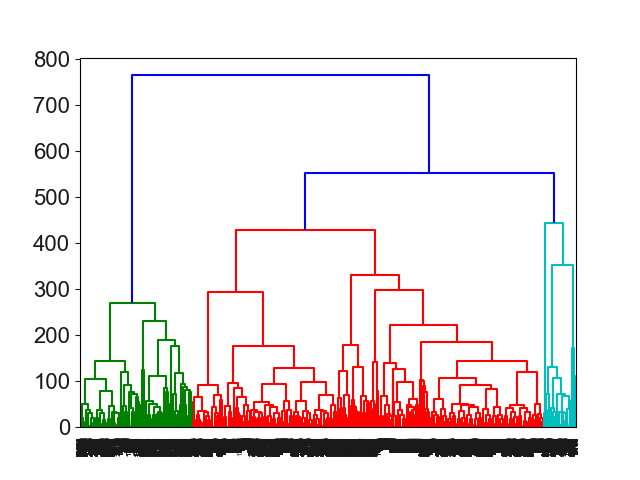

In [4]:
#Dendogram with StandardScaler()

from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
energy_df_normalized = StandardScaler().fit(energy_df).transform(energy_df)
dendrogram(ward(energy_df_normalized))
plt.show()

<IPython.core.display.Javascript object>


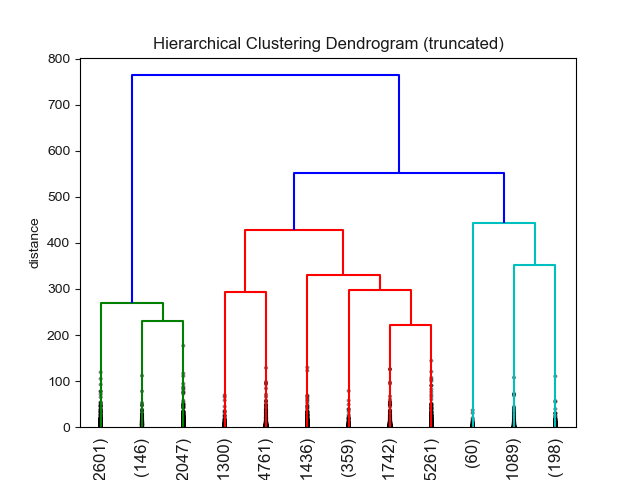

In [5]:
#Dendogram + StandardScaler()

from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.ylabel('distance')

energy_df_normalized = StandardScaler().fit(energy_df).transform(energy_df)
#energy_df_normalized = MinMaxScaler().fit(energy_df).transform(energy_df)
dendrogram(ward(energy_df_normalized),
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last p merged clusters
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [5]:
#Creating a fucnstion named fancy dendrogram diagram to illustrate the split distances in a figure
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (Truncated)')
        plt.xlabel('Cluster Size')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

<IPython.core.display.Javascript object>


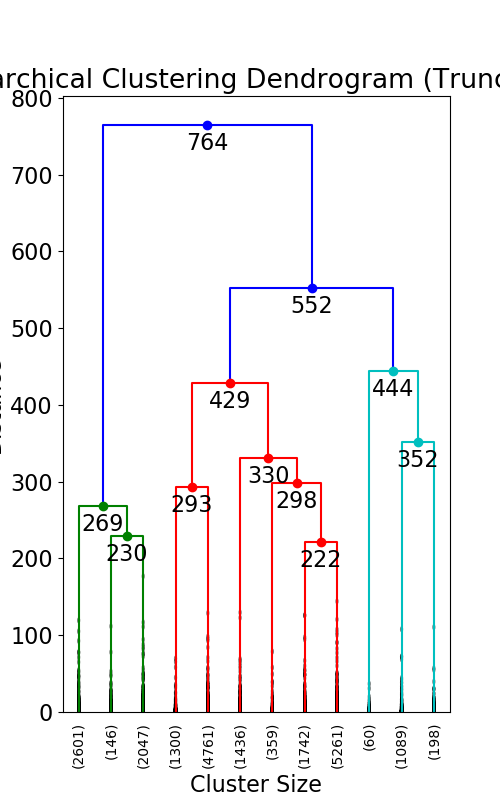

In [6]:
import matplotlib as mpl
from scipy.cluster.hierarchy import ward, dendrogram
mpl.rcParams.update({'font.size': 16})
plt.figure(figsize=(5,8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.ylabel('Distance')
fancy_dendrogram(
    ward(energy_df_normalized),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

<IPython.core.display.Javascript object>


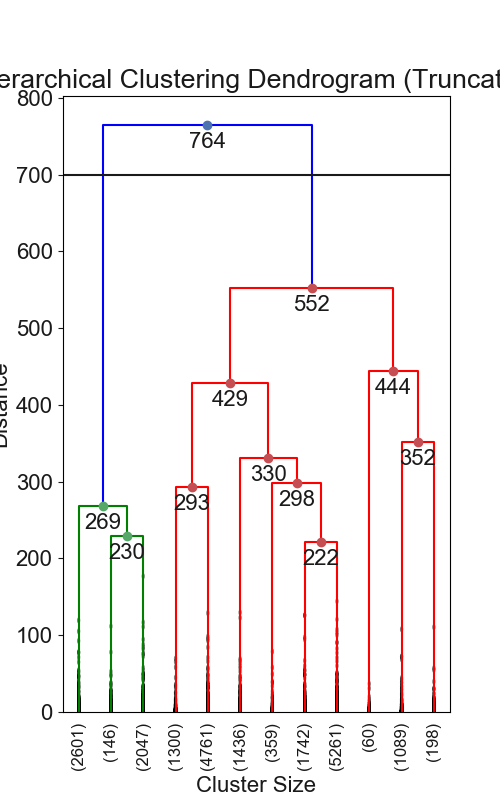

In [10]:
# set cut-off to 700
max_d = 700  # max_d as in max_distance


plt.figure(figsize=(5,8))
fancy_dendrogram(
    ward(energy_df_normalized),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

<IPython.core.display.Javascript object>


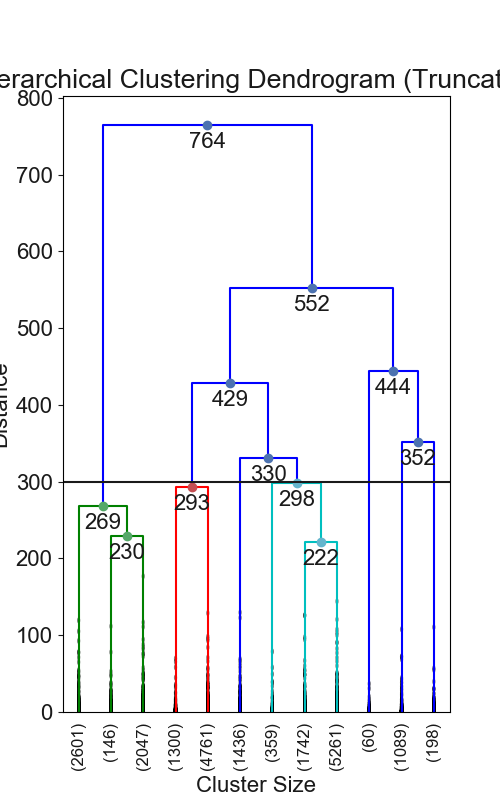

In [9]:
# set cut-off to 300
max_d = 300  # max_d as in max_distance


plt.figure(figsize=(5,8))
fancy_dendrogram(
    ward(energy_df_normalized),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

<IPython.core.display.Javascript object>


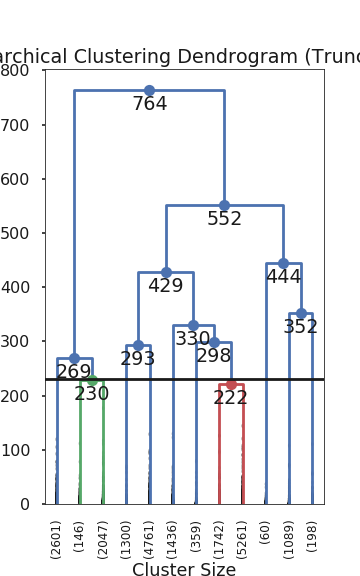

In [138]:
# set cut-off to 230
max_d = 230  # max_d as in max_distance


plt.figure(figsize=(5,8))
fancy_dendrogram(
    ward(energy_df_normalized),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [98]:
#Retrieve the Clusters (for differnet number of clusters)
from scipy.cluster.hierarchy import fcluster

BB=fcluster(ward(energy_df_normalized), 2, criterion='maxclust')
CC=fcluster(ward(energy_df_normalized), 3, criterion='maxclust')
DD=fcluster(ward(energy_df_normalized), 4, criterion='maxclust')
EE=fcluster(ward(energy_df_normalized), 5, criterion='maxclust')

In [61]:
#Clustering K=2
import pandas
df2 = pd.DataFrame(energy_df_normalized,index=energy_df_normalized[:,0])
cls2 = pd.DataFrame(BB)
df.to_csv('df.csv')
cls2.to_csv('cls2.csv')

In [62]:
#Clustering K=3
import pandas
df3 = pd.DataFrame(energy_df_normalized,index=energy_df_normalized[:,0])
cls3 = pd.DataFrame(CC)
cls3.to_csv('cls3.csv')

In [63]:
#Clustering K=4
import pandas
df4 = pd.DataFrame(energy_df_normalized,index=energy_df_normalized[:,0])
cls4 = pd.DataFrame(DD)
cls4.to_csv('cls4.csv')

In [99]:
#Clustering K=5
import pandas
#df5 = pd.DataFrame(energy_df_normalized,index=energy_df_normalized[:,0])
cls5 = pd.DataFrame(EE)
cls5.to_csv('cls5.csv')

<IPython.core.display.Javascript object>


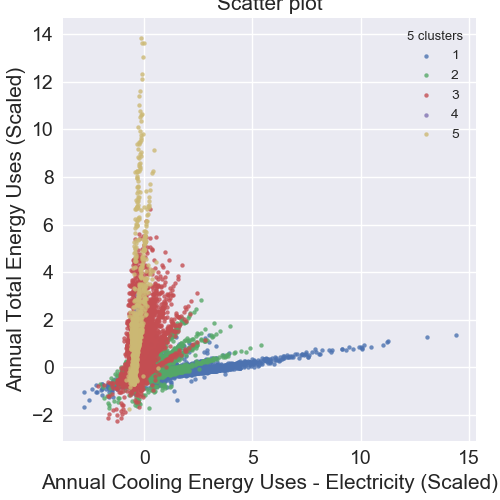

In [16]:
#Clustering K=5
from matplotlib import pyplot as plt    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import seaborn as sns; sns.set(color_codes=True)

results = pd.read_csv("C:/Users/bxa1082/OneDrive - University of Texas at Arlington/Paper Projects/Clustering paper/R Codes/sample results - 21000.csv")

#fig1 = plt.figure()
facet = sns.lmplot(data=results,
                   x='x_88', 
                   y='x_85', 
                   hue='5 clusters', 
                   fit_reg=False, 
                   legend=True, 
                   legend_out=False,
                   #markers=["o", "x","^","v","8"],
                   scatter_kws={"s": 10})

plt.title('Scatter plot',fontsize=15)
plt.ylabel('Annual Total Energy Uses (Scaled)',fontsize=15)
plt.xlabel('Annual Cooling Energy Uses - Electricity (Scaled)',fontsize=15)
plt.tick_params(labelsize=14)
#fig1.savefig('test.jpg')
#plt.show()

<IPython.core.display.Javascript object>


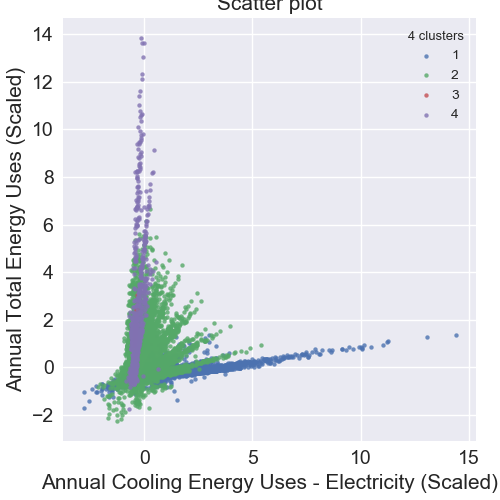

In [17]:
#Clustering K=4
from matplotlib import pyplot as plt    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import seaborn as sns; sns.set(color_codes=True)

results = pd.read_csv("C:/Users/bxa1082/OneDrive - University of Texas at Arlington/Paper Projects/Clustering paper/R Codes/sample results - 21000.csv")

#fig2 = plt.figure()
facet = sns.lmplot(data=results,
                   x='x_88', 
                   y='x_85', 
                   hue='4 clusters',  
                   fit_reg=False, 
                   legend=True, 
                   legend_out=False,
                   #markers=["^","o","v","x"],
                   scatter_kws={"s": 10},)

plt.title('Scatter plot',fontsize=15)
plt.ylabel('Annual Total Energy Uses (Scaled)',fontsize=15)
plt.xlabel('Annual Cooling Energy Uses - Electricity (Scaled)',fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

<IPython.core.display.Javascript object>


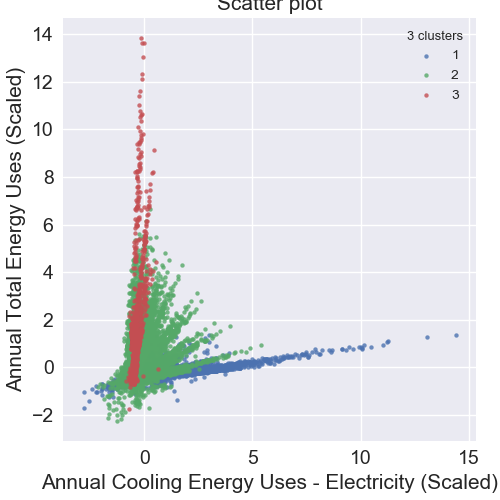

In [18]:
#Clustering K=3
from matplotlib import pyplot as plt    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import seaborn as sns; sns.set(color_codes=True)

results = pd.read_csv("C:/Users/bxa1082/OneDrive - University of Texas at Arlington/Paper Projects/Clustering paper/R Codes/sample results - 21000.csv")

#fig3 = plt.figure()
facet = sns.lmplot(data=results,
                   x='x_88', 
                   y='x_85', 
                   hue='3 clusters', 
                   fit_reg=False, 
                   legend=True, 
                   legend_out=False,
                   #markers=["o", "x","^"],
                   scatter_kws={"s": 10},)

plt.title('Scatter plot',fontsize=15)
plt.ylabel('Annual Total Energy Uses (Scaled)',fontsize=15)
plt.xlabel('Annual Cooling Energy Uses - Electricity (Scaled)',fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

<IPython.core.display.Javascript object>


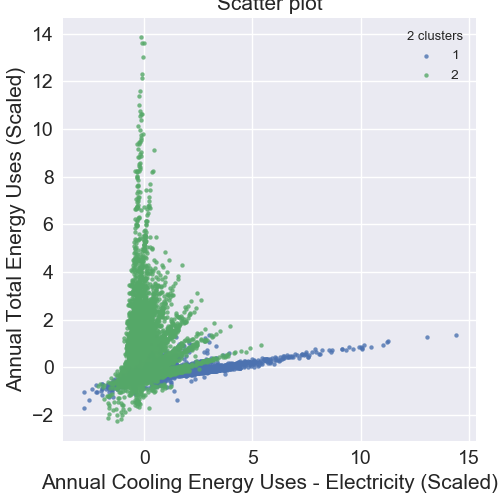

In [19]:
#Clustering K=2
from matplotlib import pyplot as plt    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import seaborn as sns; sns.set(color_codes=True)

results = pd.read_csv("C:/Users/bxa1082/OneDrive - University of Texas at Arlington/Paper Projects/Clustering paper/R Codes/sample results - 21000.csv")

#fig4 = plt.figure()
facet = sns.lmplot(data=results,
                   x='x_88', 
                   y='x_85', 
                   hue='2 clusters', 
                   fit_reg=False, 
                   legend=True, 
                   legend_out=False,
                   #markers=["o", "x"],
                   scatter_kws={"s": 10},)
plt.title('Scatter plot',fontsize=15)
plt.ylabel('Annual Total Energy Uses (Scaled)',fontsize=15)
plt.xlabel('Annual Cooling Energy Uses - Electricity (Scaled)',fontsize=15)
plt.tick_params(labelsize=14)
plt.show()